# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы случайные значения генерировались исходя из заданного сида и были каждый раз одними и теми же. Это обеспечивает однородность и воспроизводимость результатов в разных сессиях и экспериментах.")

Чтобы случайные значения генерировались исходя из заданного сида и были каждый раз одними и теми же. Это обеспечивает однородность и воспроизводимость результатов в разных сессиях и экспериментах.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
random_values = df_train.sample(10)
random_values

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
head_values = df_test.head(5)
tail_values = df_test.tail(5)

In [6]:
head_values

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
tail_values

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df_test.describe() 

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [10]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [11]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
null_values_train = df_train.isnull().sum()
null_values_train

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [13]:
null_values_test = df_test.isnull().sum()
null_values_test

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски в датафрейме есть в признаках mileage, engine, max_power, torque, seats. В среднем пропуски по этим столбцам составляют порядка 3%.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
train_without_target = df_train.drop(columns='selling_price')

duplicates = train_without_target[train_without_target.duplicated(keep=False)]

print(f"Количество объектов с одинаковым признаковым описанием: {len(duplicates)}")


Количество объектов с одинаковым признаковым описанием: 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [15]:
sorted_duplicates = duplicates.sort_values(by=list(train_without_target.columns))

sorted_duplicates

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
unique_columns = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

df_train.drop_duplicates(subset=unique_columns, keep='first', inplace=True)

df_test.drop_duplicates(subset=unique_columns, keep='first', inplace=True)


In [17]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [18]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [19]:
df_train.reset_index(drop=True, inplace=True)

df_test.reset_index(drop=True, inplace=True)


In [20]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [21]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', ''), errors='coerce')

df_train['engine'] = pd.to_numeric(df_train['engine'].astype(str).str.replace(' CC', ''), errors='coerce')

df_train['max_power'] = pd.to_numeric(df_train['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')



In [22]:
df_test['mileage'] = pd.to_numeric(df_test['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', ''), errors='coerce')

df_test['engine'] = pd.to_numeric(df_test['engine'].astype(str).str.replace(' CC', ''), errors='coerce')

df_test['max_power'] = pd.to_numeric(df_test['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')

In [23]:
import re

def clean_and_convert(value, is_kgm=False):
    if pd.isna(value):
        return np.nan

    cleaned_value = re.sub(r'[^0-9.-]', '', value)

    converted_value = float(cleaned_value)
    if is_kgm:
        converted_value *= 9.80665
    return converted_value

def split_torque(row):
    if pd.isna(row) or '@' not in row:
        return [np.nan, np.nan]
    
    parts = row.split('@')
    torque = parts[0]
    rpm = parts[1] if len(parts) > 1 else np.nan

    is_kgm = 'kgm' in torque

    torque = clean_and_convert(torque.replace('Nm', '').replace('kgm', '').strip(), is_kgm=is_kgm)

    if '-' in str(rpm):
        min_rpm, max_rpm = rpm.replace('rpm', '').split('-')
        rpm = (clean_and_convert(min_rpm.strip()) + clean_and_convert(max_rpm.strip())) / 2
    else:
        rpm = clean_and_convert(rpm.replace('rpm', '').strip())
    
    return [torque, rpm]

df_train[['torque_value', 'max_torque_rpm']] = pd.DataFrame(df_train['torque'].apply(lambda x: split_torque(x)).tolist(), index=df_train.index)

print(df_train[['torque_value', 'max_torque_rpm']].head())




   torque_value  max_torque_rpm
0        190.00          2000.0
1        250.00          2000.0
2           NaN             NaN
3         11.50          4500.0
4        113.75          4000.0


In [24]:
df_test[['torque_value', 'max_torque_rpm']] = pd.DataFrame(df_test['torque'].apply(lambda x: split_torque(x)).tolist(), index=df_test.index)

print(df_test[['torque_value', 'max_torque_rpm']].head())

   torque_value  max_torque_rpm
0           NaN             NaN
1         260.0          2125.0
2         172.0          4300.0
3         200.0          1750.0
4           NaN             NaN


In [25]:
df_train.drop('torque', axis=1, inplace=True)


In [26]:
df_test.drop('torque', axis=1, inplace=True)

In [27]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.00,2000.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,NaN,NaN
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,11.50,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0,96.10,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,90.00,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.70,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,24.00,2325.0


In [28]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0,NaN,NaN
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0,260.00,2125.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0,172.00,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0,200.00,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0,99.04,4500.0
927,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0,114.70,4000.0
928,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,NaN,NaN
929,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0,111.80,4000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [29]:
'''

Заполнение пропусков для трейна

'''

medians = df_train.median()

df_train.fillna(medians, inplace=True)

missing_data = df_train.isna().sum()

print("Пропуски после заполнения:", missing_data)

Пропуски после заполнения: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_value      0
max_torque_rpm    0
dtype: int64


/var/folders/_y/g0r3jchn7nx891txysm6nrw80000gn/T/ipykernel_5446/608176081.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df_train.median()


In [30]:
'''

Заполнение пропусков для теста

'''

medians = df_train.median()

df_test.fillna(medians, inplace=True)

missing_data = df_test.isna().sum()

print("Пропуски после заполнения:", missing_data)

Пропуски после заполнения: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_value      0
max_torque_rpm    0
dtype: int64


/var/folders/_y/g0r3jchn7nx891txysm6nrw80000gn/T/ipykernel_5446/3564637544.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df_train.median()



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [31]:
print("<Seats обычно принимает значения, 2-4-5-6-7 , и при этом ограничено определенным набором значений. К тому же отсутсвует порядок и иерархий в рамках этих значений. Что довольно похоже на свойства категориальных признаков.>")






<Seats обычно принимает значения, 2-4-5-6-7 , и при этом ограничено определенным набором значений. К тому же отсутсвует порядок и иерархий в рамках этих значений. Что довольно похоже на свойства категориальных признаков.>


In [32]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)


In [33]:
df_test['engine'] = df_train['engine'].astype(int)
df_test['seats'] = df_train['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

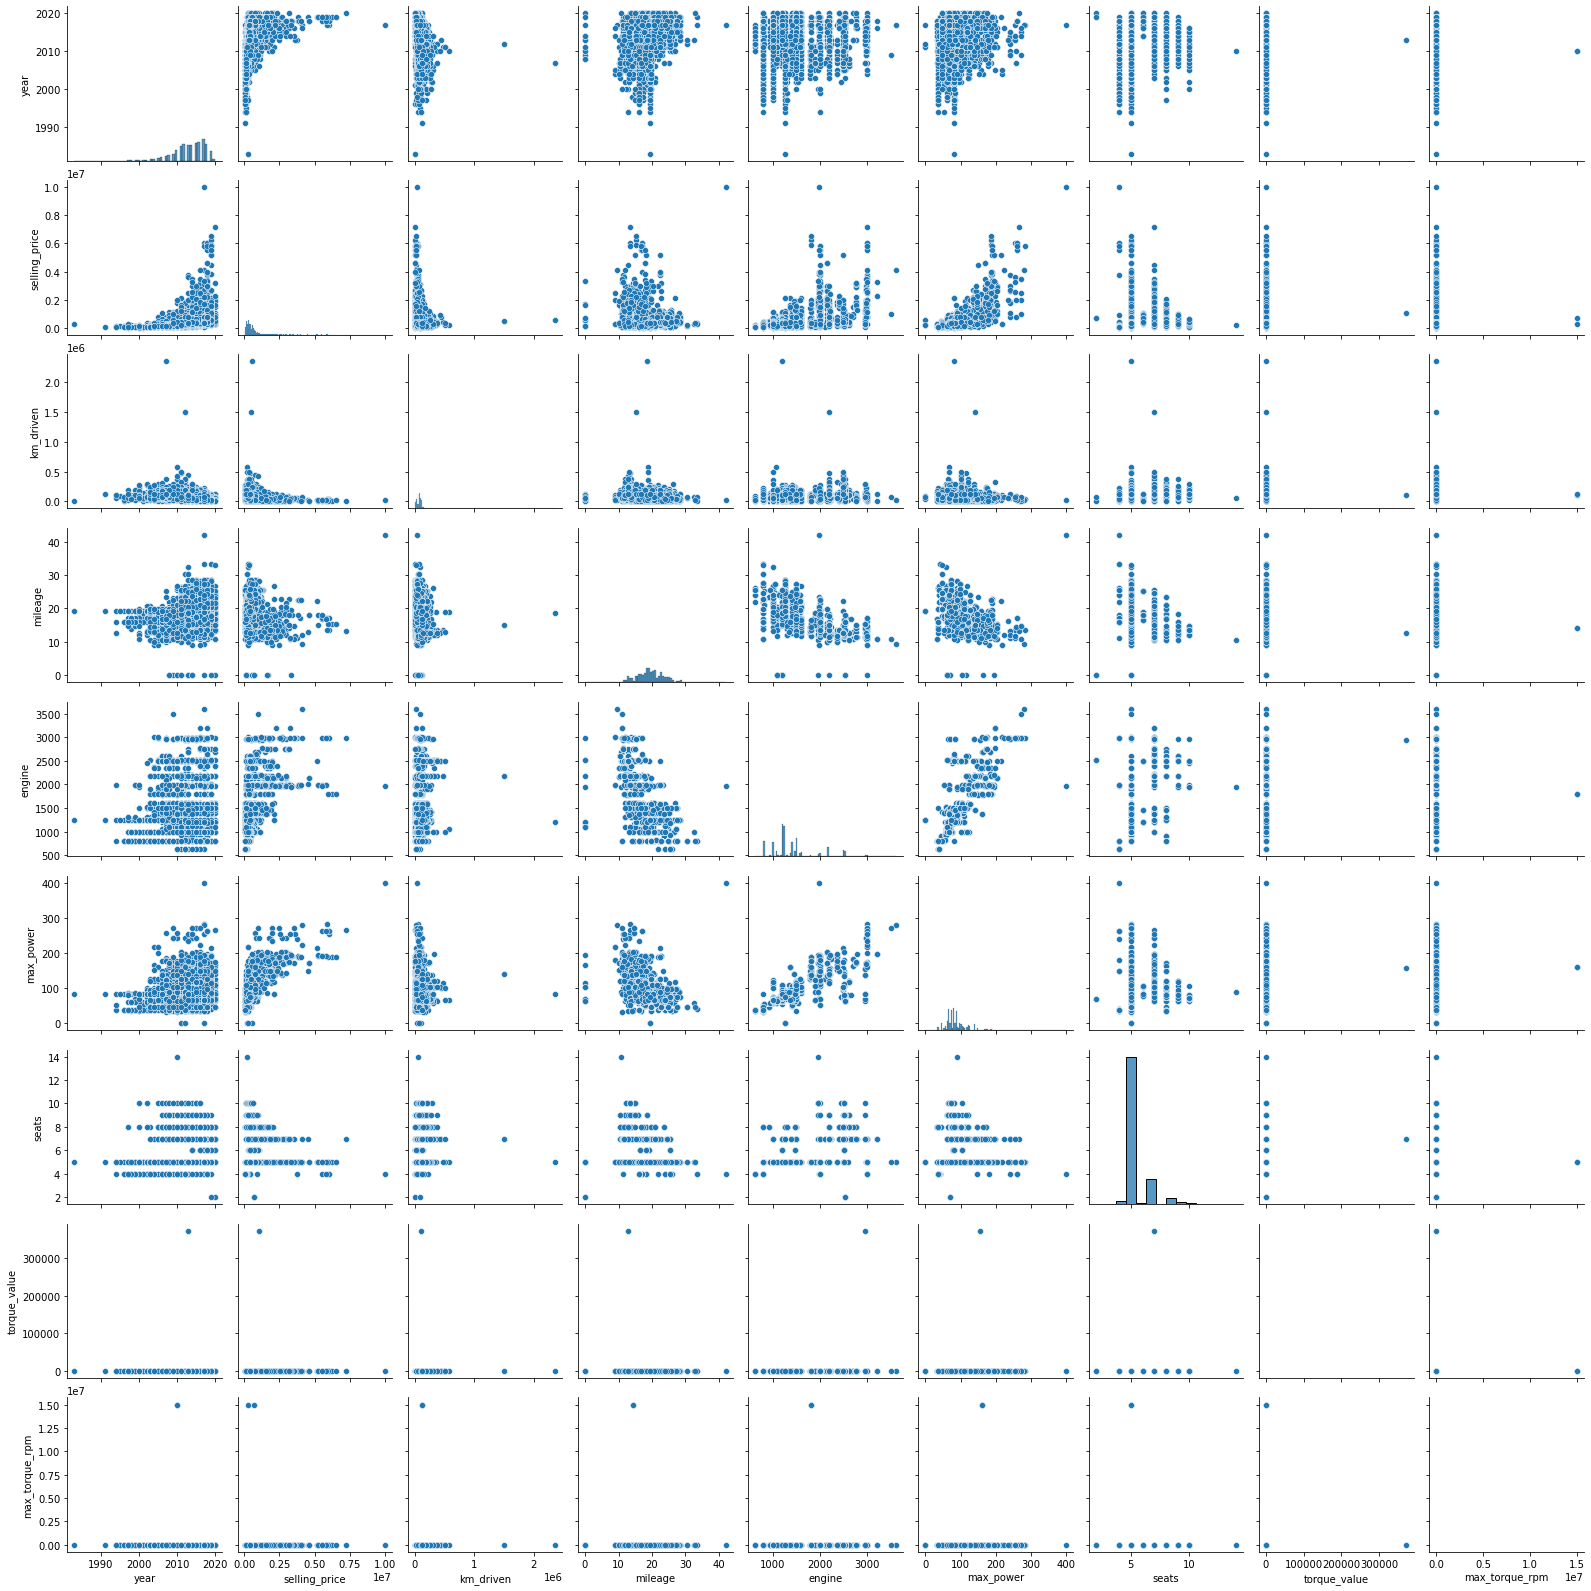

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train.select_dtypes(include=['float64', 'int64']))

plt.show()


Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

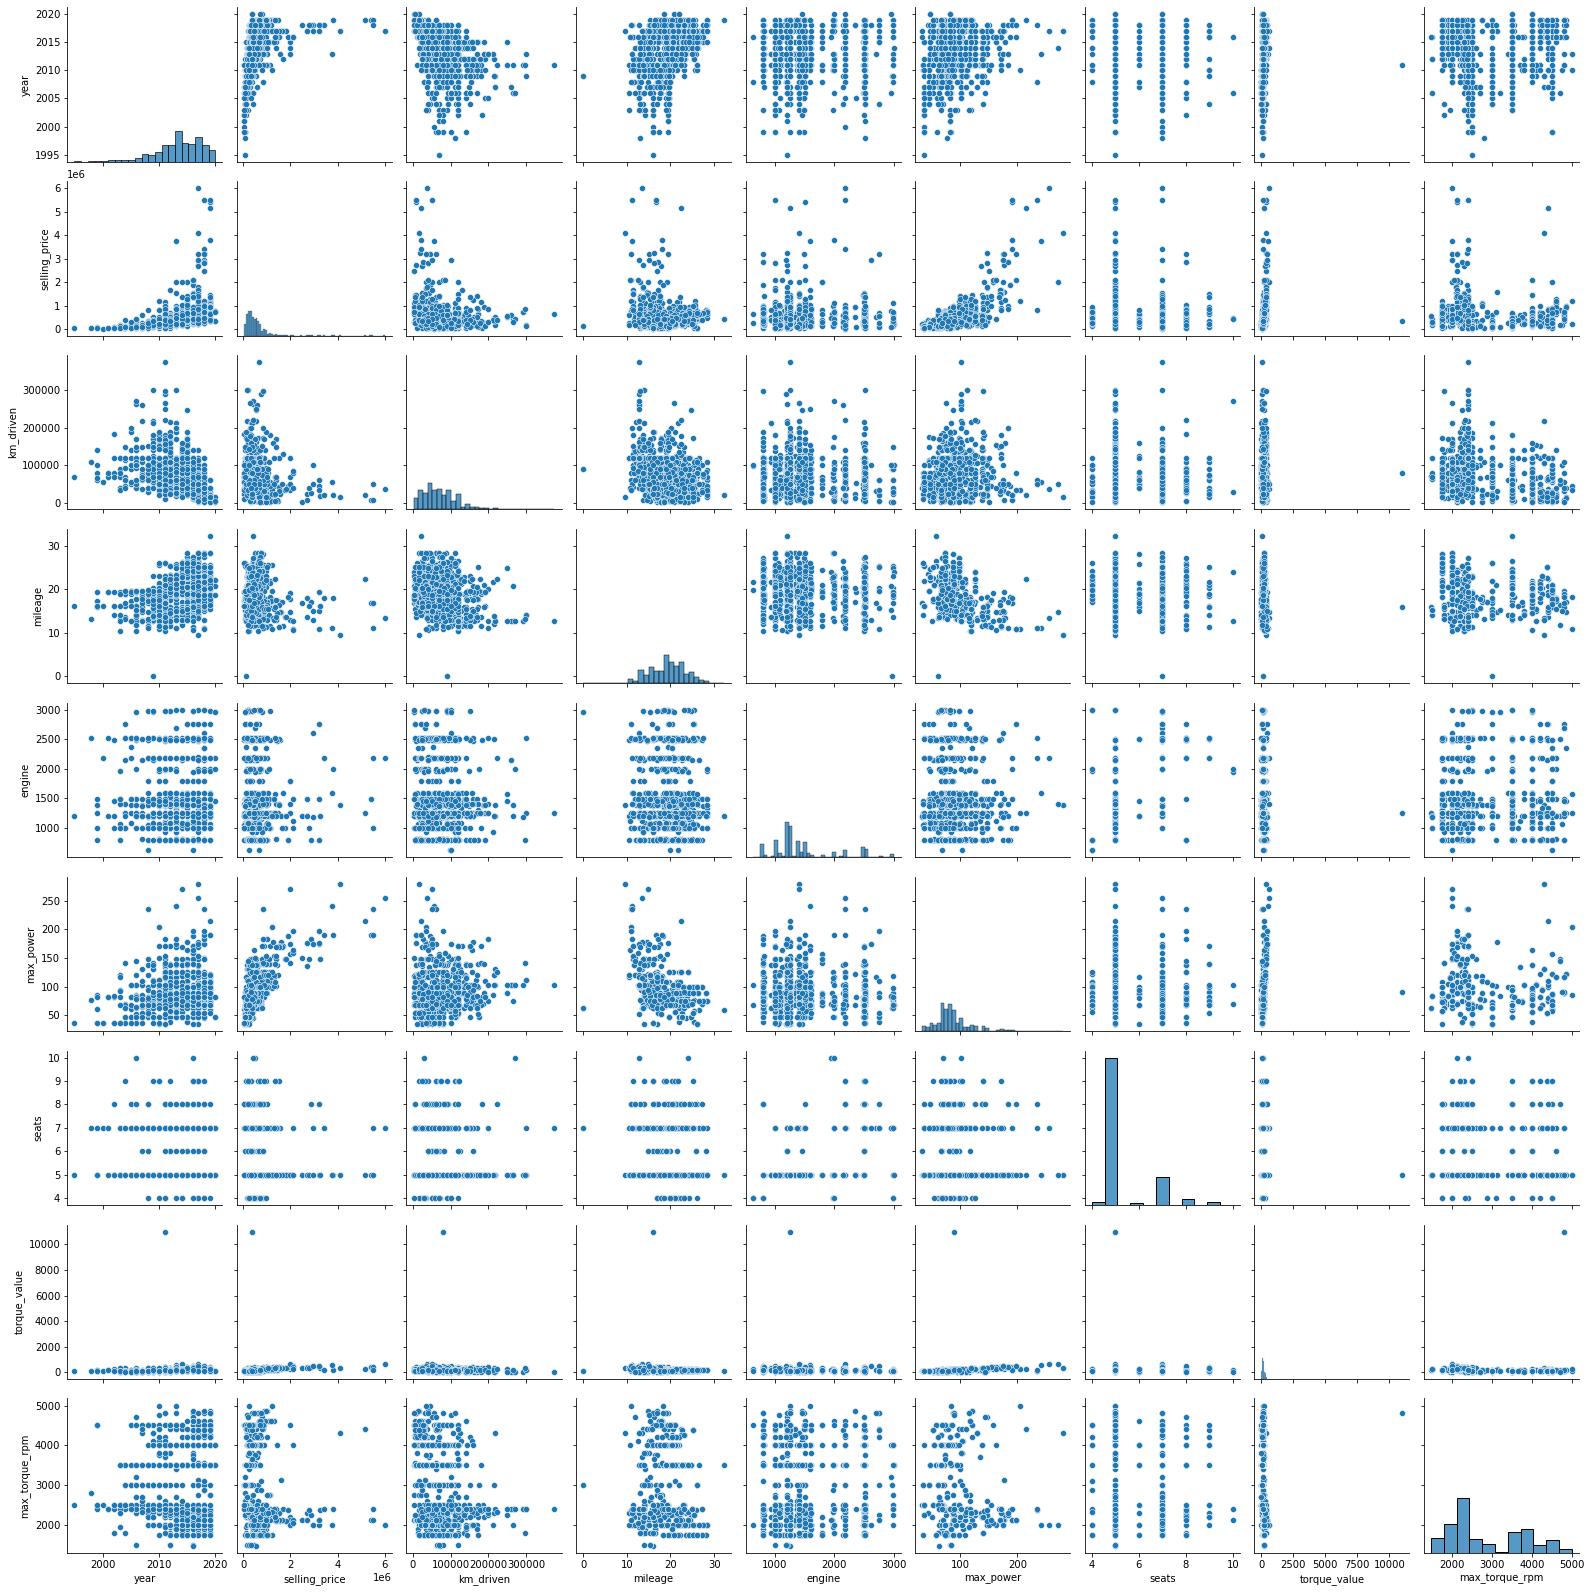

In [36]:
sns.pairplot(df_test.select_dtypes(include=['float64', 'int64']))

Ответ: Совокупности оказались похожими, но не всегда. Одна из причин - это выбросы, которые наблюдаются в трейне. Из-за этого происходит сильное смещение значений по оси ординат или абсцисс, в результате чего теряется информативность и похожесть. 

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

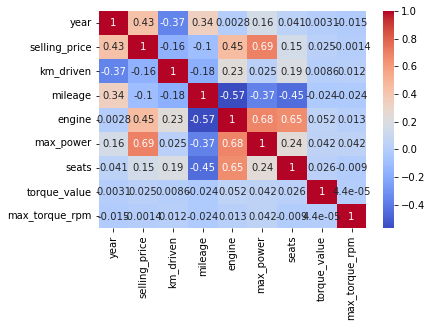

In [37]:
corr_matrix = df_train.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* Наименее скоррелированные признаки: selling_price и max_torque_rpm с корреляцией 0.0014
* Наиболее сильно скоррелированные признаки: selling_price и max_power с корреляцией 0.69 / Также имеет высокую кореляцию  max_power/engine и engine/seats
* Коэффициент корреляции между признаком year и km_driven равняется 0.37, что является умеренно положительной линейной связью. Ответ, предполагаю такой - ( да, связь есть, но она умеренная, не ярко-выраженная).

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

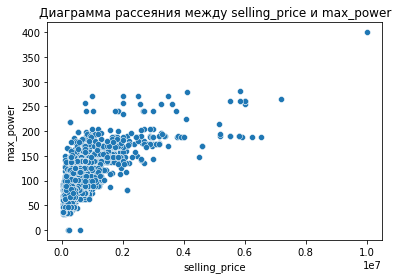

In [38]:
sns.scatterplot(data=df_train, x='selling_price', y='max_power')
plt.title('Диаграмма рассеяния между selling_price и max_power')
plt.show()



### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

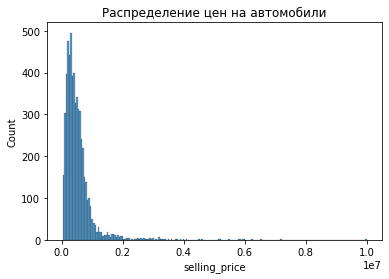

In [39]:
'''

Данная гистограмма позволяет рассмотреть и определить распределение целевого признака.

'''


sns.histplot(df_train['selling_price'], bins=200)
plt.title('Распределение цен на автомобили')
plt.show()


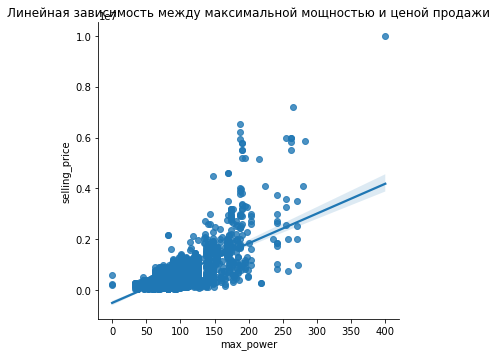

In [40]:
'''

Данный график позволяет оценить линейную зависимость между selling_price и max_power, наглядно оценив кореляцию и выбросы.

'''


sns.lmplot(x='max_power', y='selling_price', data=df_train)
plt.title('Линейная зависимость между максимальной мощностью и ценой продажи')
plt.show()


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [41]:
df_train1 = df_train.copy()
df_test1 = df_test.copy()

In [42]:
y_train = df_train1['selling_price'].copy()
y_test = df_test1['selling_price'].copy()

In [43]:
df_train1.drop('selling_price', axis=1, inplace=True)
df_test1.drop('selling_price', axis=1, inplace=True)

In [44]:
categorical_columns = df_train1.select_dtypes(include=['object', 'category']).columns.tolist()

df_train1.drop(categorical_columns, axis=1, inplace=True)
df_test1.drop(categorical_columns, axis=1, inplace=True)

In [45]:
X_train = df_train1.copy()
X_test = df_test1.copy()

In [46]:
X_test.sample()

,year,km_driven,mileage,engine,max_power,seats,torque_value,max_torque_rpm
82,2017,18300,17.8,1198,117.3,5,145.0,4600.0


In [47]:
assert X_train.shape == (5840, 8)

In [48]:
X_test.shape

(931, 8)

In [49]:
assert X_test.shape == (931, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)

y_test_pred = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print("Тренировочный набор: R^2 =", r2_train, ", MSE =", mse_train)
print("Тестовый набор: R^2 =", r2_test, ", MSE =", mse_test)


Тренировочный набор: R^2 = 0.5927473289229175 , MSE = 116734228929.34584
Тестовый набор: R^2 = 0.5958881330242991 , MSE = 144702516161.87134


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train_scaled, y_train)

y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print("Тренировочный набор: R^2 =", r2_train, ", MSE =", mse_train)
print("Тестовый набор: R^2 =", r2_test, ", MSE =", mse_test)

Тренировочный набор: R^2 = 0.5927473289229181 , MSE = 116734228929.34567
Тестовый набор: R^2 = 0.5958881330243622 , MSE = 144702516161.84875


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [52]:
coefficients = lin_reg.coef_

max_coef_index = np.argmax(np.abs(coefficients))
most_informative_feature = X_train.columns[max_coef_index]

print("Наиболее информативный признак:", most_informative_feature)

Наиболее информативный признак: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

lasso_reg = Lasso()

lasso_reg.fit(X_train_scaled, y_train)

y_train_pred = lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print("Lasso-регрессия, тренировочный набор: R^2 =", r2_train, ", MSE =", mse_train)
print("Lasso-регрессия, тестовый набор: R^2 =", r2_test, ", MSE =", mse_test)


Lasso-регрессия, тренировочный набор: R^2 = 0.5927473288800851 , MSE = 116734228941.62329
Lasso-регрессия, тестовый набор: R^2 = 0.5958898468846203 , MSE = 144701902470.66077


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [54]:
coefficients = lasso_reg.coef_

zero_coefficients = np.sum(coefficients == 0)

print(f"Количество зануленных коэффициентов: {zero_coefficients}")


Количество зануленных коэффициентов: 0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [55]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший результат (MSE):", -best_score)


Лучшие параметры: {'alpha': 1000}
Лучший результат (MSE): 121223990171.56367


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Чтобы определить количество моделей, которые GridSearchCV обучил в процессе поиска по сетке, нужно умножить количество различных значений параметров, перебираемых в сетке, на количество фолдов в кросс-валидации.

В нашем случае происходит перебор параметра alpha с 7 различными значениями и 10-кратная кросс-валидацию, общее число обученных моделей отсюда равно 70.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [56]:
coefficients = lasso_reg.coef_

zero_coefficients = np.sum(coefficients == 0)

print(f"Количество зануленных коэффициентов: {zero_coefficients}")


Количество зануленных коэффициентов: 0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}


elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший результат (MSE):", -best_score)


Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.5}
Лучший результат (MSE): 121563691199.98538


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [58]:
print("Лучшие параметры:", best_params)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.5}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [83]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [84]:
df_train2.drop(['selling_price', 'name'], axis=1, inplace=True)
df_test2.drop(['selling_price', 'name'], axis=1, inplace=True)

In [85]:
X_train_cat = df_train2.copy()
X_test_cat = df_test2.copy()

In [86]:
assert X_train_cat.shape == (5840, 12)

In [87]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [88]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,931,931,931,931
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,498,813,839,562


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [89]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

X_train_cat['seats'] = X_train_cat['seats'].astype('object')
X_test_cat['seats'] = X_test_cat['seats'].astype('object')

encoder = OneHotEncoder(sparse=False, drop='first')

categorical_cols_with_seats = X_train_cat.select_dtypes(include=['object']).columns

encoded_train_data = encoder.fit_transform(X_train_cat[categorical_cols_with_seats])

encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categorical_cols_with_seats))

X_train_full = pd.concat([X_train_cat.drop(categorical_cols_with_seats, axis=1), encoded_train_df], axis=1)

encoded_test_data = encoder.transform(X_test_cat[categorical_cols_with_seats])
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_cols_with_seats))
X_test_full = pd.concat([X_test_cat.drop(categorical_cols_with_seats, axis=1), encoded_test_df], axis=1)

(X_train_full, X_test_full)



(      year  km_driven  mileage  engine  max_power  torque_value  \
 0     2014     145500    23.40    1248      74.00        190.00   
 1     2014     120000    21.14    1498     103.52        250.00   
 2     2010     127000    23.00    1396      90.00        150.00   
 3     2007     120000    16.10    1298      88.20         11.50   
 4     2017      45000    20.14    1197      81.86        113.75   
 ...    ...        ...      ...     ...        ...           ...   
 5835  2008     191000    17.92    1086      62.10         96.10   
 5836  2013      50000    18.90     998      67.10         90.00   
 5837  2013     110000    18.50    1197      82.85        113.70   
 5838  2007     119000    16.80    1493     110.00         24.00   
 5839  2009     120000    19.30    1248      73.90        190.00   
 
       max_torque_rpm  fuel_Diesel  fuel_LPG  fuel_Petrol  ...  \
 0             2000.0          1.0       0.0          0.0  ...   
 1             2000.0          1.0       0.0      

In [92]:
# Масштабируем числовые признаки в тренировочном наборе, и затем с теми же коэфициентами в тестовом

from sklearn.preprocessing import StandardScaler

numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque_value', 'max_torque_rpm']

scaler = StandardScaler()

X_train_full[numeric_cols] = scaler.fit_transform(X_train_full[numeric_cols])

X_test_full[numeric_cols] = scaler.transform(X_test_full[numeric_cols])

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [99]:
# Перебор параметра регуляризации alpha для гребневой регрессии с помощью GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error


ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10, verbose=1)

grid_search_ridge.fit(X_train_full, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_score_ridge = grid_search_ridge.best_score_

print(f"Лучший параметр alpha для гребневой регрессии: {best_alpha_ridge}")
print(f"Лучшая метрика R^2 для гребневой регрессии: {best_score_ridge}")

y_pred_ridge = grid_search_ridge.predict(X_test_full)

r2_test_ridge = r2_score(y_test, y_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Метрика R^2 на тестовом наборе для гребневой регрессии: {r2_test_ridge}")
print(f"MSE на тестовом наборе для гребневой регрессии: {mse_test_ridge}")

ridge_results = {
    'best_alpha': best_alpha_ridge,
    'best_r2_score': best_score_ridge,
    'test_r2_score': r2_test_ridge,
    'test_mse': mse_test_ridge
}


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Лучший параметр alpha для гребневой регрессии: 100
Лучшая метрика R^2 для гребневой регрессии: 0.615484341923157
Метрика R^2 на тестовом наборе для гребневой регрессии: 0.6285626334204613
MSE на тестовом наборе для гребневой регрессии: 133002581544.65552


In [100]:
# Сохраняем pickle файлы

import joblib


joblib.dump(grid_search_ridge, 'saved_model.pkl')
joblib.dump(encoder, 'saved_encoder.pkl')
joblib.dump(scaler, 'saved_scaler.pkl')


['saved_scaler.pkl']

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [101]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [103]:
def custom_metric(y_true, y_pred):

    deviation = abs(y_pred - y_true) / y_true

    accurate_predictions = (deviation <= 0.1).sum()

    accuracy_rate = accurate_predictions / len(y_true)

    return accuracy_rate

custom_metric_value = custom_metric(y_test, y_pred_ridge)
custom_metric_value




0.22341568206229862

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI, File, UploadFile
from pydantic import BaseModel
from typing import List
import pandas as pd
import io
import joblib

app = FastAPI()

# Загрузка обученных объектов

model = joblib.load('saved_model.pkl')
encoder = joblib.load('saved_encoder.pkl')
scaler = joblib.load('saved_scaler.pkl')

class Item(BaseModel):
    # Определение полей объекта
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: int

class Items(BaseModel):
    # Класс для коллекции объектов
    objects: List[Item]

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    # Преобразование данных в DataFrame
    data = pd.DataFrame([item.dict()])

    # Кодирование категориальных признаков
    encoded_data = encoder.transform(data[categorical_cols_with_seats])

    # Масштабирование числовых признаков
    data[numeric_cols] = scaler.transform(data[numeric_cols])

    # Объединение данных
    data_prepared = pd.concat([data.drop(categorical_cols_with_seats, axis=1), 
                               pd.DataFrame(encoded_data, columns=encoder.get_feature_names(categorical_cols_with_seats))], axis=1)

    # Предсказание
    prediction = model.predict(data_prepared)[0]
    return prediction

@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)) -> str:
    # Чтение CSV-файла
    df = pd.read_csv(io.StringIO(str(file.file.read(), 'utf-8')))

    # Кодирование категориальных признаков
    encoded_data = encoder.transform(df[categorical_cols_with_seats])

    # Масштабирование числовых признаков
    df[numeric_cols] = scaler.transform(df[numeric_cols])

    # Объединение данных
    data_prepared = pd.concat([df.drop(categorical_cols_with_seats, axis=1), 
                               pd.DataFrame(encoded_data, columns=encoder.get_feature_names(categorical_cols_with_seats))], axis=1)

    # Предсказание
    predictions = model.predict(data_prepared)

    # Добавление предсказаний в DataFrame и сохранение результата
    df['predictions'] = predictions
    result_file = io.StringIO()
    df.to_csv(result_file, index=False)
    result_file.seek(0)

    return result_file.read()



К сожалению, сервис на api не смог запустить. В процессе разработки крякнулось окружение, в итоге не снос, ни другие подходы не помогли исправить проблему, не завелось. 

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link